In [1]:
from graph import *
from metrics import *

In [2]:
from scipy.stats import norm

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.optimize import minimize_scalar

In [5]:
from statistics import *

In [6]:
s = [1000, 100]

In [7]:
c0 = Classifier([1000, 100], 10, 3.0, 1.0)
c1 = Classifier([1000, 500], 2, 3.0, 1.0)
c2 = Classifier([1000, 900], 1.1, 3.0, 1.0)

In [8]:
zs = np.linspace(-3.0, 6.0, 101)

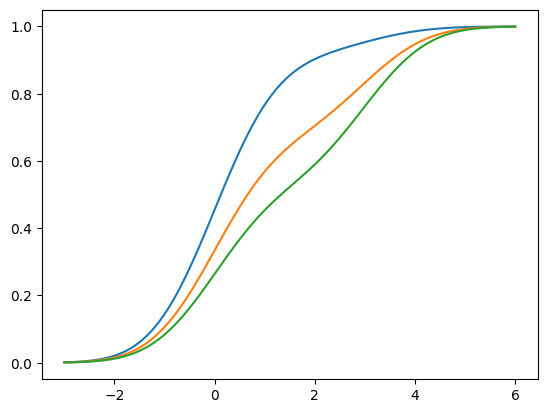

In [9]:
plt.plot(zs, c0.scores(zs))
plt.plot(zs, c1.scores(zs))
plt.plot(zs, c2.scores(zs))

In [10]:
def ratio_to_samples(ratio):
    n = 1000
    neg = n / ratio
    pos = n - neg
    samples = [pos, neg]
    return samples

In [11]:
skill = np.linspace(0.0, 6.0, 101)
rat = 100
samples = ratio_to_samples(rat)
f1_skill = [f1_score(Classifier(samples, rat, s, 1.0).error_matrix) for s in skill]
recall_skill = [recall(Classifier(samples, rat, s, 1.0).error_matrix) for s in skill]
prec_skill = [precision(Classifier(samples, rat, s, 1.0).error_matrix) for s in skill]

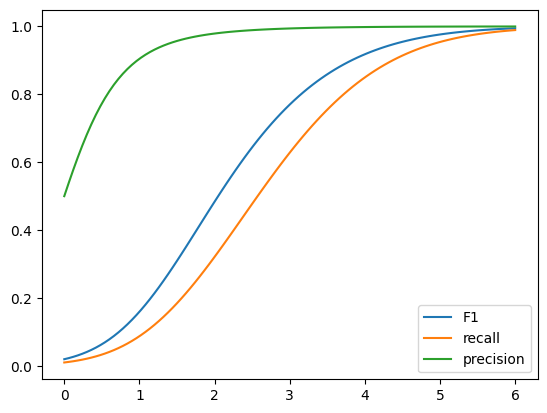

In [12]:
plt.plot(skill, f1_skill, label="F1")
plt.plot(skill, recall_skill, label="recall")
plt.plot(skill, prec_skill, label="precision")
plt.legend()

In [13]:
c0.error_matrix

array([[0.97505997, 0.1494003 ],
       [0.02494003, 0.8505997 ]])

In [14]:
c1.error_matrix

array([[0.74518656, 0.00962688],
       [0.25481344, 0.99037312]])

In [15]:
c2.error_matrix

array([[1.72691151e-01, 4.01364383e-05],
       [8.27308849e-01, 9.99959864e-01]])

In [16]:
f1_score(s * c1.error_matrix)

0.43643119335257086

In [17]:
xs = np.linspace(-2, 3, 101)
ratios = [1.0 + 10**r for r in xs]
ems = [Classifier(ratio_to_samples(r), r, 3.0, 1.0).error_matrix for r in ratios]

/Users/wilkie/code/system_flow/statistics.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  self.ratio_fn = lambda x: self.scores(x) / self.accept(x)


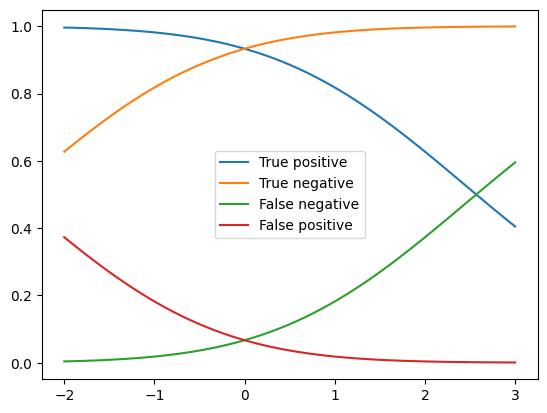

In [18]:
plt.plot(xs, list(map(lambda x: x[1,1], ems)), label="True positive")
plt.plot(xs, list(map(lambda x: x[0,0], ems)), label="True negative")
plt.plot(xs, list(map(lambda x: x[0,1], ems)), label="False negative")
plt.plot(xs, list(map(lambda x: x[1,0], ems)), label="False positive")
plt.legend()

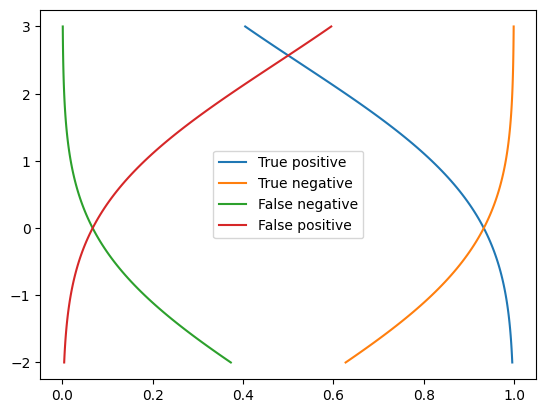

In [19]:
plt.plot( list(map(lambda x: x[1,1], ems)), xs, label="True positive")
plt.plot( list(map(lambda x: x[0,0], ems)), xs, label="True negative")
plt.plot(list(map(lambda x: x[1,0], ems)), xs, label="False negative")
plt.plot(list(map(lambda x: x[0,1], ems)), xs, label="False positive")
plt.legend()

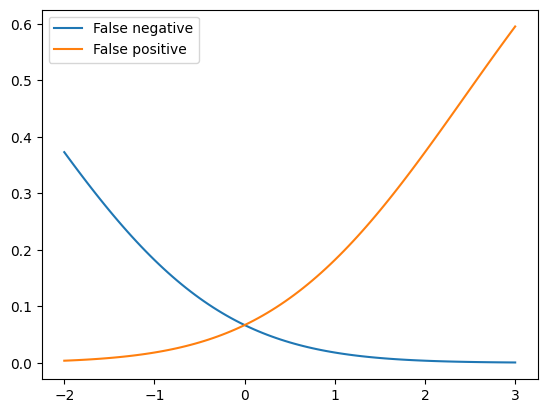

In [20]:
plt.plot(xs, list(map(lambda x: x[1,0], ems)), label="False negative")
plt.plot(xs, list(map(lambda x: x[0,1], ems)), label="False positive")
plt.legend()